In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# filepath = os.path.join("logs", "manual_testing", "all_injured_10_infected")
# filepath = os.path.join("logs", "manual_testing", "10_percent_infected")
# filepath = os.path.join("logs", "manual_testing", "15_percent_infected")
# filepath = os.path.join("logs", "manual_testing", "15_with_occupations")
# filepath = os.path.join("logs", "manual_testing", "15_occupation_bound_ib0_sb9")
filepath = os.path.join("logs", "manual_testing", "15_occupation_bound_ib2_sb8")
# filepath = os.path.join("logs", "manual_testing", "20_percent_infected")

collected_data = []

for folder in os.listdir(filepath):
    if os.path.isdir(os.path.join(filepath, folder)):
        for file in os.listdir(os.path.join(filepath, folder)):
            doctor_bound, engineer_bound = [int(x.split("b")[1]) for x in folder.split("_")]

            # parse results
            if file.startswith("results"):
                data = pd.read_csv(os.path.join(filepath, folder, file))
                collected_data.append({
                    'doctor_bound': doctor_bound,
                    'engineer_bound': engineer_bound,
                    'data': data.mean()
                })
            # read in actions
            elif file.startswith("actions"):
                pass
            # read config
            elif file.startswith("config"):
                pass

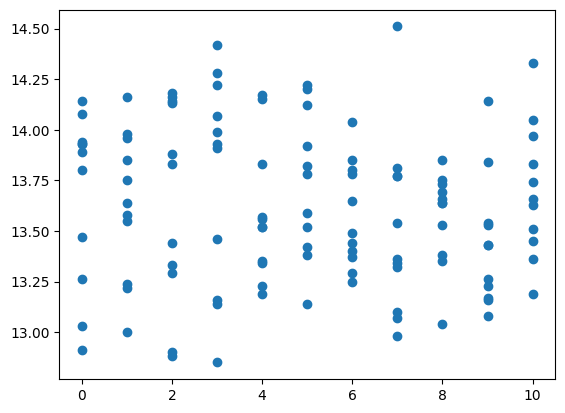

In [23]:
x = [x['doctor_bound'] for x in collected_data]
y = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]

plt.plot(x, y, 'o')

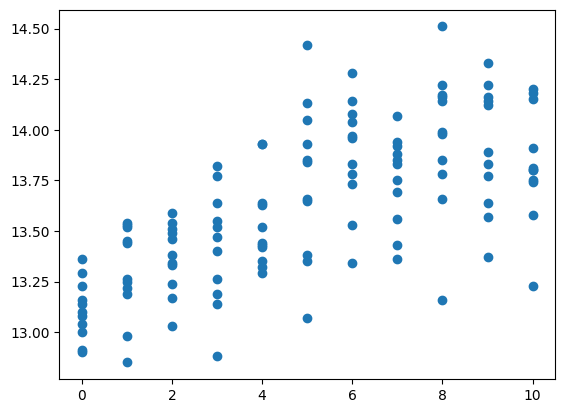

In [24]:
x = [x['engineer_bound'] for x in collected_data]
y = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]

plt.plot(x, y, 'o')

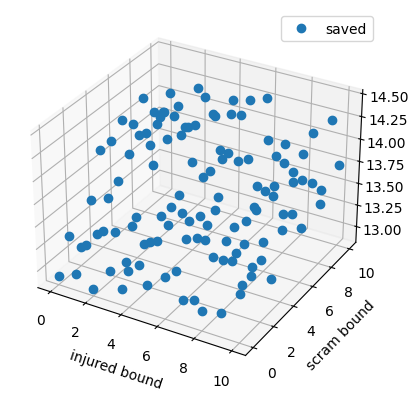

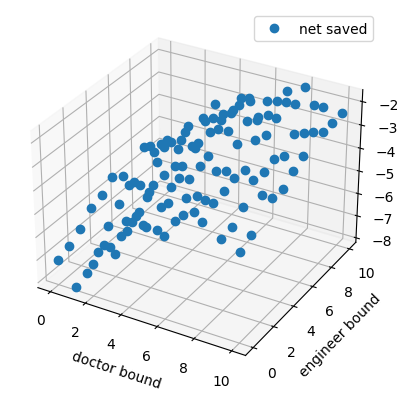

In [25]:
x = [x['doctor_bound'] for x in collected_data]
y = [x['engineer_bound'] for x in collected_data]
z_saved = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]
z_squish = [x['data']['killed_in_squish'] for x in collected_data]
z_zom = [x['data']['killed_zombie'] for x in collected_data]

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.set_xlabel("injured bound")
ax.set_ylabel("scram bound")

ax.plot(x, y, z_saved, 'o', label="saved")
# ax.plot(x, y, z_squish, 'o', label="injured squished")
# ax.plot(x, y, z_zom, 'o', label="murdered by zombies")

ax.legend()

z_com = [x['data']['saved_in'] - x['data']['killed_in_squish'] for x in collected_data]

fig2 = plt.figure()
# syntax for 3-D projection
ax2 = plt.axes(projection ='3d')

ax2.set_xlabel("doctor bound")
ax2.set_ylabel("engineer bound")

ax2.plot(x, y, z_com, 'o', label="net saved")

ax2.legend()

In [35]:
# find injured and scram bound that maximize saved mean
df = pd.DataFrame(data=[[x['doctor_bound'], x['engineer_bound'], x['data']['saved_h'] + x['data']['saved_in']] for x in collected_data], columns=["doctor_bound", "engineer_bound", "saved mean"])
df.loc[df['saved mean'].idxmax()]

doctor_bound       7.00
engineer_bound     8.00
saved mean        14.51
Name: 7, dtype: float64

In [27]:
filepath = os.path.join("logs", "manual_testing", "15_updated_model","ib0_sb10", "results.csv")
data = pd.read_csv(filepath)

data.mean()

# filepath = os.path.join("logs", "manual_testing", "15_with_occupations","ib0_sb10", "results.csv")
# data = pd.read_csv(filepath)
# data.mean()


FileNotFoundError: [Errno 2] No such file or directory: 'logs/manual_testing/15_updated_model/ib0_sb10/results.csv'